In [1]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [3]:
# 1. Scan all files and create inventory
inventory_df = inventory.scan_files()

print(f"\n📋 File Inventory Overview:")
print(f"Total files: {len(inventory_df)}")
print(f"Total size: {inventory_df['size_mb'].sum():.2f} MB")
print(f"\nBy file type:")
print(inventory_df['type'].value_counts())

print(f"\n📁 Detailed file list:")
display(inventory_df.sort_values(['type', 'name']))

🔍 扫描数据文件...

📋 File Inventory Overview:
Total files: 32
Total size: 237.83 MB

By file type:
type
CSV数据文件          6
Shapefile投影信息    5
Shapefile属性表     5
Shapefile索引      5
Shapefile矢量数据    5
Shapefile编码信息    4
QGIS元数据          1
Excel文件          1
Name: count, dtype: int64

📁 Detailed file list:


,name,path,full_path,type,extension,size_mb,modified
30,GSLB_1900-2023_TS_with_aquifers.csv,groundwater/GSLB_1900-2023_TS_with_aquifers.csv,../data/raw/groundwater/GSLB_1900-2023_TS_with...,CSV数据文件,.csv,6.708851,2025-06-10 19:34:07.045495
31,GSLB_1900-2023_wells_with_aquifers.csv,groundwater/GSLB_1900-2023_wells_with_aquifers...,../data/raw/groundwater/GSLB_1900-2023_wells_w...,CSV数据文件,.csv,0.678126,2025-06-10 19:34:08.096793
28,gsl_nwm.csv,streamflow/gsl_nwm.csv,../data/raw/streamflow/gsl_nwm.csv,CSV数据文件,.csv,0.064493,2025-07-03 09:41:37.478069
22,gsl_nwm_gage.csv,hydrography/gsl_nwm_gage.csv,../data/raw/hydrography/gsl_nwm_gage.csv,CSV数据文件,.csv,0.007058,2024-10-16 08:22:58.000000
29,gsl_nwm_gage.csv,streamflow/gsl_nwm_gage.csv,../data/raw/streamflow/gsl_nwm_gage.csv,CSV数据文件,.csv,0.007058,2024-10-16 08:22:58.000000
26,reach_centroids_with_Elev.csv,streamflow/reach_centroids_with_Elev.csv,../data/raw/streamflow/reach_centroids_with_El...,CSV数据文件,.csv,0.427972,2024-12-18 13:58:52.000000
27,GAGES-II_ref_non_ref.xlsx,streamflow/GAGES-II_ref_non_ref.xlsx,../data/raw/streamflow/GAGES-II_ref_non_ref.xlsx,Excel文件,.xlsx,0.146719,2025-01-20 12:58:53.000000
24,well_shp.qmd,hydrography/well_shp.qmd,../data/raw/hydrography/well_shp.qmd,QGIS元数据,.qmd,0.000654,2024-12-04 12:14:50.000000
20,gsl_basin.dbf,hydrography/gsl_basin.dbf,../data/raw/hydrography/gsl_basin.dbf,Shapefile属性表,.dbf,0.002329,2024-05-07 13:14:56.000000
16,gsl_catchment.dbf,hydrography/gsl_catchment.dbf,../data/raw/hydrography/gsl_catchment.dbf,Shapefile属性表,.dbf,0.274306,2025-07-20 15:04:12.070201


In [4]:
# 2. Generate detailed health report
health_report = inventory.generate_health_report(inventory_df)

print("\n🏥 DATA HEALTH REPORT")
print("=" * 60)

# Summary statistics
summary = health_report['summary']
print(f"Scan completed: {summary['scan_time'].strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Total files analyzed: {summary['total_files']}")
print(f"Total storage used: {summary['total_size_mb']:.2f} MB")

print("\n📊 File Type Distribution:")
for file_type, count in summary['file_types'].items():
    print(f"  • {file_type}: {count} files")

print("\n🔍 Detailed File Analysis:")
print("-" * 60)

for filename, details in health_report['details'].items():
    print(f"\n📄 {filename}")

    if 'error' in details:
        print(f"  ❌ Error: {details['error']}")
        continue

    # CSV file analysis
    if filename.endswith('.csv'):
        print(f"  📈 Rows: {details['rows']:,}")
        print(f"  📊 Columns: {details['columns']}")
        print(f"  🔢 Numeric columns: {details['numeric_columns']}")
        print(f"  💾 Memory usage: {details['memory_usage_mb']:.2f} MB")
        print(f"  ❌ Missing data: {details['missing_percentage']:.1f}%")

        if details['date_columns']:
            print(f"  📅 Date columns: {', '.join(details['date_columns'])}")

            # Show date ranges
            for col in details['date_columns']:
                range_key = f"{col}_range"
                if range_key in details:
                    date_range = details[range_key]
                    print(f"    • {col}: {date_range['start'].strftime('%Y-%m-%d')} to {date_range['end'].strftime('%Y-%m-%d')}")
                    print(f"      Duration: {date_range['span_years']:.1f} years")

    # Shapefile analysis
    elif filename.endswith('.shp'):
        print(f"  🗺️  Features: {details['features']:,}")
        print(f"  📋 Attributes: {details['attributes']}")
        print(f"  🔷 Geometry: {details['geometry_type']}")
        print(f"  🌐 CRS: {details['crs']}")

        if details['bounds']:
            bounds = details['bounds']
            print(f"  📍 Bounds: [{bounds[0]:.4f}, {bounds[1]:.4f}, {bounds[2]:.4f}, {bounds[3]:.4f}]")

        if details['missing_geometry'] > 0:
            print(f"  ⚠️  Missing geometry: {details['missing_geometry']} features")

        if details['area_hectares']:
            print(f"  📐 Total area: {details['area_hectares']:,.0f} hectares")

🏥 生成数据健康报告...

🏥 DATA HEALTH REPORT
Scan completed: 2025-08-12 16:06:09
Total files analyzed: 32
Total storage used: 237.83 MB

📊 File Type Distribution:
  • CSV数据文件: 6 files
  • Shapefile投影信息: 5 files
  • Shapefile属性表: 5 files
  • Shapefile索引: 5 files
  • Shapefile矢量数据: 5 files
  • Shapefile编码信息: 4 files
  • QGIS元数据: 1 files
  • Excel文件: 1 files

🔍 Detailed File Analysis:
------------------------------------------------------------

📄 gslb_stream.shp
  🗺️  Features: 6,717
  📋 Attributes: 14
  🔷 Geometry: LineString
  🌐 CRS: EPSG:4326
  📍 Bounds: [-114.9823, 37.9671, -110.6126, 42.8376]

📄 gsl_basin.shp
  🗺️  Features: 1
  📋 Attributes: 41
  🔷 Geometry: MultiPolygon
  🌐 CRS: EPSG:4269
  📍 Bounds: [-115.0099, 37.9472, -110.5985, 42.8558]

📄 gsl_catchment.shp
  🗺️  Features: 7,013
  📋 Attributes: 3
  🔷 Geometry: Polygon
  🌐 CRS: EPSG:4326
  📍 Bounds: [-115.0099, 37.9472, -110.5985, 42.8556]

📄 well_shp.shp
  🗺️  Features: 8,752
  📋 Attributes: 9
  🔷 Geometry: Point
  🌐 CRS: EPSG:4326
  📍


🗺️ SHAPEFILE VISUALIZATION
Found 5 shapefiles to plot
✅ Plotted: gslb_stream.shp (6717 features, CRS: EPSG:4326)
✅ Plotted: gsl_basin.shp (1 features, CRS: EPSG:4269)
✅ Plotted: gsl_catchment.shp (7013 features, CRS: EPSG:4326)
✅ Plotted: well_shp.shp (8752 features, CRS: EPSG:4326)
✅ Plotted: lake.shp (202 features, CRS: EPSG:4269)


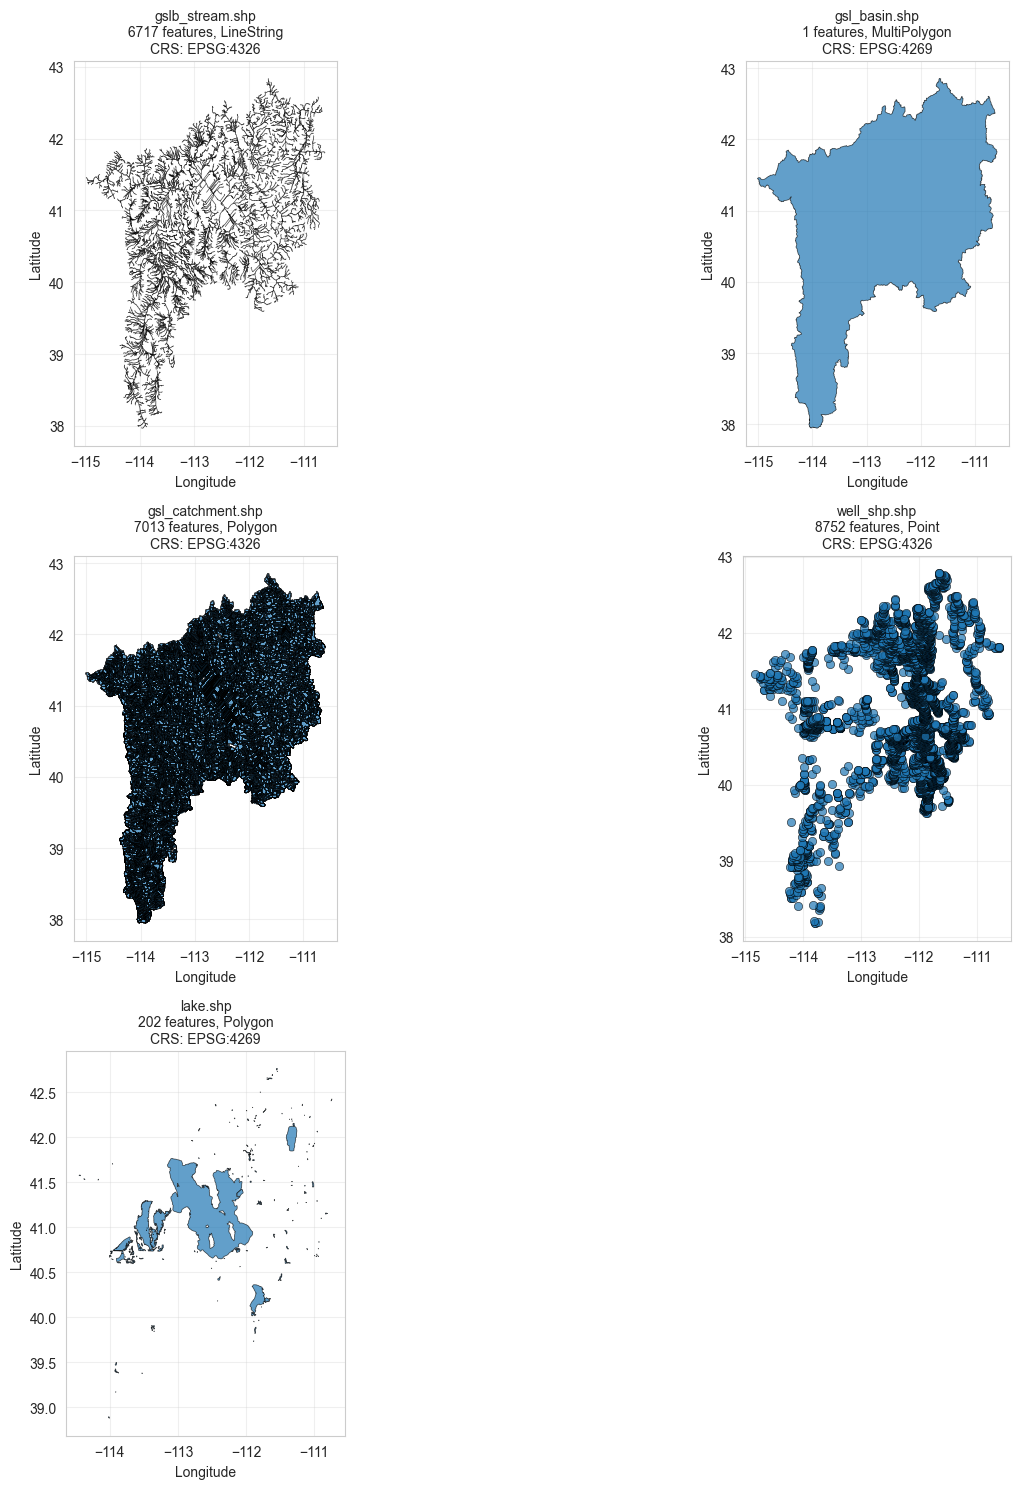

In [8]:
# 3. Visualize all shapefiles
print("\n🗺️ SHAPEFILE VISUALIZATION")
print("=" * 60)

# Get all shapefile paths
shapefiles = inventory_df[inventory_df['extension'] == '.shp']['full_path'].tolist()

if not shapefiles:
    print("No shapefiles found!")
else:
    print(f"Found {len(shapefiles)} shapefiles to plot")
    
    # Create subplots
    n_shapefiles = len(shapefiles)
    cols = 2
    rows = (n_shapefiles + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, shp_path in enumerate(shapefiles):
        row = i // cols
        col = i % cols
        ax = axes[row, col] if rows > 1 else axes[col]
        
        try:
            # Read shapefile
            gdf = gpd.read_file(shp_path)
            filename = Path(shp_path).name
            
            # Plot
            gdf.plot(ax=ax, alpha=0.7, edgecolor='black', linewidth=0.5)
            
            # Get CRS information
            crs_info = str(gdf.crs) if gdf.crs else 'Unknown CRS'
            
            # Format title with CRS
            title = f"{filename}\n{len(gdf)} features, {gdf.geom_type.iloc[0] if len(gdf) > 0 else 'Empty'}\nCRS: {crs_info}"
            ax.set_title(title, fontsize=10)
            ax.set_xlabel("Longitude")
            ax.set_ylabel("Latitude")
            
            # Add grid
            ax.grid(True, alpha=0.3)
            
            print(f"✅ Plotted: {filename} ({len(gdf)} features, CRS: {crs_info})")
            
        except Exception as e:
            ax.text(0.5, 0.5, f"Error loading\n{Path(shp_path).name}\n{str(e)}", 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f"ERROR: {Path(shp_path).name}")
            print(f"❌ Error plotting {filename}: {e}")
    
    # Hide empty subplots
    for i in range(n_shapefiles, rows * cols):
        row = i // cols
        col = i % cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()


🌍 COMBINED SPATIAL OVERLAY
✅ Added layer: gslb_stream (6717 LineStrings)
✅ Added layer: gsl_basin (1 MultiPolygons)
✅ Added layer: gsl_catchment (7013 Polygons)
✅ Added layer: well_shp (8752 Points)
✅ Added layer: lake (202 Polygons)


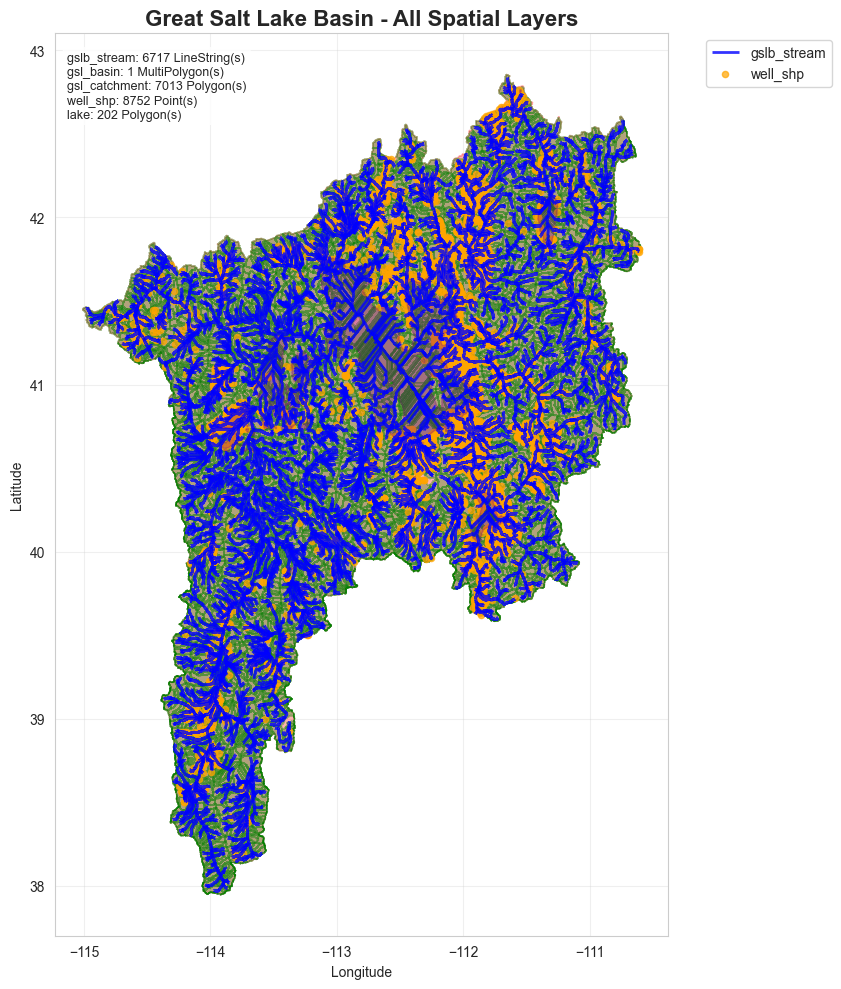

In [6]:
# 4. Create an overlay map showing all spatial data together
print("\n🌍 COMBINED SPATIAL OVERLAY")
print("=" * 60)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Define colors for different layers
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
layer_info = []

for i, shp_path in enumerate(shapefiles):
    try:
        gdf = gpd.read_file(shp_path)
        filename = Path(shp_path).stem

        if len(gdf) > 0:
            # Choose plotting style based on geometry type
            geom_type = gdf.geom_type.iloc[0]
            color = colors[i % len(colors)]

            if geom_type in ['Point', 'MultiPoint']:
                gdf.plot(ax=ax, color=color, markersize=20, alpha=0.7, label=filename)
            elif geom_type in ['LineString', 'MultiLineString']:
                gdf.plot(ax=ax, color=color, linewidth=2, alpha=0.8, label=filename)
            else:  # Polygon types
                gdf.plot(ax=ax, color=color, alpha=0.3, edgecolor=color, linewidth=1, label=filename)

            layer_info.append(f"{filename}: {len(gdf)} {geom_type}(s)")
            print(f"✅ Added layer: {filename} ({len(gdf)} {geom_type}s)")

    except Exception as e:
        print(f"❌ Error loading {filename}: {e}")

ax.set_title("Great Salt Lake Basin - All Spatial Layers", fontsize=16, fontweight='bold')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add layer information as text
info_text = "\n".join(layer_info)
ax.text(0.02, 0.98, info_text, transform=ax.transAxes, fontsize=9,
        verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

In [7]:
# 5. Data Quality Summary and Recommendations
print("\n📋 DATA QUALITY SUMMARY & RECOMMENDATIONS")
print("=" * 70)

# Analyze data quality issues
issues = []
recommendations = []

# Check CSV files for issues
csv_files = [f for f in health_report['details'].keys() if f.endswith('.csv')]
for filename in csv_files:
    details = health_report['details'][filename]
    if 'error' not in details:
        # Check missing data
        if details['missing_percentage'] > 10:
            issues.append(f"❌ {filename}: High missing data ({details['missing_percentage']:.1f}%)")
            recommendations.append(f"🔧 Consider data cleaning/imputation for {filename}")

        # Check date coverage
        for col in details['date_columns']:
            range_key = f"{col}_range"
            if range_key in details:
                span = details[range_key]['span_years']
                if span < 10:
                    issues.append(f"⚠️  {filename}: Short time series ({span:.1f} years)")
                    recommendations.append(f"📅 Consider extending time series for {filename}")

# Check shapefiles for issues
shp_files = [f for f in health_report['details'].keys() if f.endswith('.shp')]
for filename in shp_files:
    details = health_report['details'][filename]
    if 'error' not in details:
        if details['crs'] == 'Unknown':
            issues.append(f"❌ {filename}: Missing coordinate reference system")
            recommendations.append(f"🌐 Define CRS for {filename}")

        if details['missing_geometry'] > 0:
            issues.append(f"❌ {filename}: {details['missing_geometry']} features with missing geometry")
            recommendations.append(f"🔧 Clean geometry errors in {filename}")

print("🚨 IDENTIFIED ISSUES:")
if issues:
    for issue in issues:
        print(f"  {issue}")
else:
    print("  ✅ No major data quality issues detected!")

print(f"\n💡 RECOMMENDATIONS:")
if recommendations:
    for rec in recommendations:
        print(f"  {rec}")
else:
    print("  ✅ Data appears to be in good condition!")

print(f"\n📊 DATASET OVERVIEW:")
print(f"  • Groundwater data: {len([f for f in csv_files if 'groundwater' in f or 'well' in f.lower()])} files")
print(f"  • Streamflow data: {len([f for f in csv_files if 'stream' in f.lower() or 'flow' in f.lower() or 'gage' in f.lower()])} files")
print(f"  • Spatial boundaries: {len([f for f in shp_files if 'basin' in f.lower() or 'catchment' in f.lower()])} files")
print(f"  • Hydrography: {len([f for f in shp_files if 'stream' in f.lower() or 'lake' in f.lower()])} files")
print(f"  • Point locations: {len([f for f in shp_files if 'well' in f.lower() or 'gage' in f.lower()])} files")

print(f"\n✅ Data inventory and health check completed successfully!")
print(f"📝 Report generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


📋 DATA QUALITY SUMMARY & RECOMMENDATIONS
🚨 IDENTIFIED ISSUES:
  ✅ No major data quality issues detected!

💡 RECOMMENDATIONS:
  ✅ Data appears to be in good condition!

📊 DATASET OVERVIEW:
  • Groundwater data: 1 files
  • Streamflow data: 1 files
  • Spatial boundaries: 2 files
  • Hydrography: 2 files
  • Point locations: 1 files

✅ Data inventory and health check completed successfully!
📝 Report generated: 2025-08-12 16:08:17
